In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.float_format = '{:,.2f}'.format

import os
print(os.listdir("./csv"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
trainData = pd.read_csv("./csv/train.csv", sep = ',')
testData = pd.read_csv("./csv/test.csv", sep = ',')

In [3]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00",...,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00",...,857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [4]:
trainData.isnull().sum().loc[(trainData.isnull().sum() != 0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [31]:
trainData['PoolArea'].loc[(trainData['PoolArea'] == 0)].count()

1453

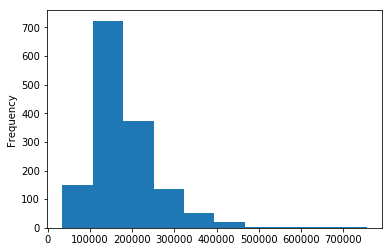

In [5]:
trainData['SalePrice'].plot.hist()

In [6]:
trainData.corr()
# We can see that
# SalePrice/OverallQual = 0.79
# SalePrice/GrLivArea = 0.71
# SalePrice/GarageCars = 0.64
# SalePrice/GarageArea = 0.62
# SalePrice/TotalBsmtSF = 0.61

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,...,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,...,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,...,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,...,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,...,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,...,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


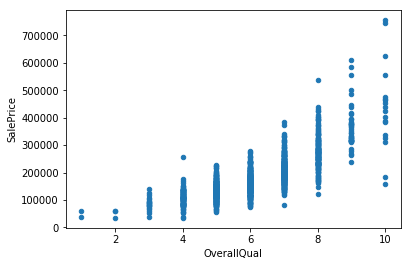

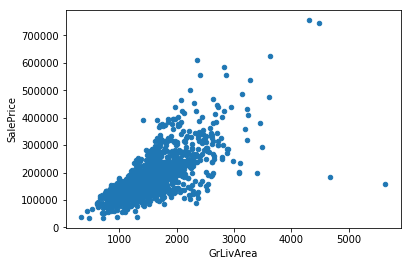

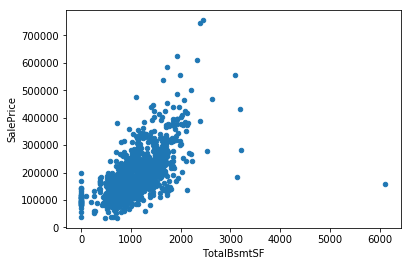

In [7]:
trainData.plot.scatter(x = 'OverallQual', y = 'SalePrice')
trainData.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
trainData.plot.scatter(x = 'TotalBsmtSF', y = 'SalePrice')

In [8]:
newTrainData = pd.DataFrame()
newTrainData['Id'] = trainData['Id']
newTrainData['OverallQual'] = trainData['OverallQual']
newTrainData['GrLivArea'] = trainData['GrLivArea']
newTrainData['TotalBsmtSF'] = trainData['TotalBsmtSF']
newTrainData['GarageCars'] = trainData['GarageCars']
newTrainData['SalePrice'] = trainData['SalePrice']
newTrainData.describe()

,Id,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,SalePrice
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,6.10,"1,515.46","1,057.43",1.77,"180,921.20"
std,421.61,1.38,525.48,438.71,0.75,"79,442.50"
min,1.00,1.00,334.00,0.00,0.00,"34,900.00"
25%,365.75,5.00,"1,129.50",795.75,1.00,"129,975.00"
50%,730.50,6.00,"1,464.00",991.50,2.00,"163,000.00"
75%,"1,095.25",7.00,"1,776.75","1,298.25",2.00,"214,000.00"
max,"1,460.00",10.00,"5,642.00","6,110.00",4.00,"755,000.00"


In [9]:
training_set = newTrainData.sample(frac=0.8, replace=False)
validate_set = newTrainData.loc[ set(newTrainData.index) - set(training_set.index)]

In [14]:
overall_feat = tf.feature_column.numeric_column('OverallQual')
livarea_feat = tf.feature_column.numeric_column('GrLivArea')
bsmsf_feat = tf.feature_column.numeric_column('TotalBsmtSF')
garage_feat = tf.feature_column.numeric_column('GarageCars')

estimator = tf.estimator.LinearRegressor(
    feature_columns=[overall_feat, livarea_feat, bsmsf_feat, garage_feat],
    model_dir = "./data"
)

train_fn = tf.estimator.inputs.pandas_input_fn(
    x = training_set.drop('SalePrice', axis = 1),
    y = training_set.SalePrice,
    num_epochs = None,
    shuffle = True,
    target_column='target'
)
estimator.train(input_fn = train_fn, steps = 500)
        
evalu_fn = tf.estimator.inputs.pandas_input_fn(
    x = validate_set.drop('SalePrice', axis = 1),
    y = validate_set.SalePrice,
    num_epochs = 1,
    shuffle = False,
    target_column = 'target'
)
evaluation = estimator.evaluate(input_fn = evalu_fn, steps = 500)
print (evaluation)

{'average_loss': 22622642000.0, 'label/mean': 179669.92, 'loss': 2201937000000.0, 'prediction/mean': 47908.676, 'global_step': 2500}


In [34]:
import itertools

input_fn = tf.estimator.inputs.pandas_input_fn(
    x = testData,
    y = None,
    num_epochs = None,
    shuffle = False,
    target_column = 'target'
)
prediction = estimator.predict(input_fn = input_fn)
# output = pd.DataFrame(
#     [(Id, SalePrice) for Id, SalePrice in zip(testData['Id'], prediction)],
#     columns = ['Id', 'SalePrice']
# )
# output.to_csv("./output_0.csv")
print(np.array([item['predictions'][0] for item in prediction]))

InternalError: Unable to get element as bytes.